In [25]:
# Importando funciones
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [83]:
df = pd.read_csv('Colombia_COVID19_Coronavirus_casos_diarios.csv')

df.tail()

OBJECTID  NUEVOS_CASOS  TOTAL_CASOS  TOTAL_MUERTES  TOTAL_RECUPERADOS   
804      2041          1508      6304317         141708            6131248  \
805      2042          1245      6305562         141746            6132645   
806      2043           990      6306552         141769            6133785   
807      2044           820      6307372         141794            6134690   
808      2045           715      6308087         141807            6135815   

        FECHA_ACTUALIZACION                              GlobalID   
804  2022/09/08 05:00:00+00  23164e92-a9aa-465b-8e86-afd29e14906a  \
805  2022/09/15 05:00:00+00  1a96431c-a63f-4b29-8927-2611cce2c91a   
806  2022/09/22 05:00:00+00  644f4eba-60b1-4f0e-ad46-d3b3a4d522d8   
807  2022/09/29 05:00:00+00  d129486b-f11f-4d1a-912e-60213a66712c   
808  2022/10/06 05:00:00+00  b54a2f09-ea17-45dc-a347-919a6932dd96   

     NUEVOS_MUERTOS  NUEVO_RECUPERADOS  
804              62               2788  
805              38               1397  
806              23               1140  
807              25                905  
808              13               1125

In [13]:
# Definiendo Kernel a Utilizar: Epanechnikov

def K_h(x):
    Mask = (abs(x) <= 1)

    return ((3/4)*(1-x**2))*Mask

In [93]:
# Columna a utilizar
columna = 'NUEVOS_CASOS'

Data_y = df[columna].to_numpy()
Data_x = np.arange(len(Data_y))

Data_y = Data_y/Data_y.max()

In [102]:
# Aplicando Kernel a los datos
h = 3

Data_new = np.zeros(len(Data_x))

for i in range(len(Data_x)):
    X = Data_x[i]*np.ones(len(Data_x))
    Data_new[i] = np.sum(Data_y*K_h((X-Data_x)/h))/h


# Data_new

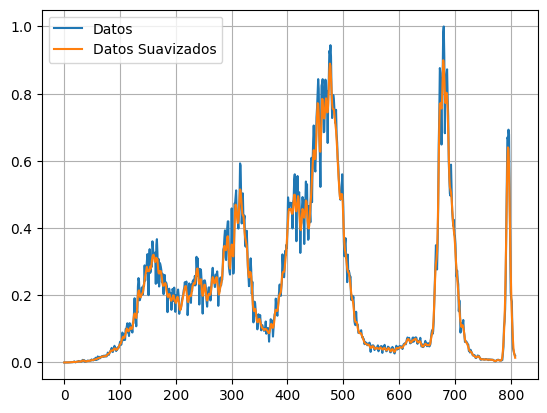

In [104]:
# Graficando

plt.plot(Data_x,Data_y, label = 'Datos')
plt.plot(Data_x,Data_new, label = 'Datos Suavizados')

plt.legend()
plt.grid()
plt.show()
